In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
train = pd.read_csv("/Users/a1/Desktop/big data final/new/train_preprocessed_new.csv")
test = pd.read_csv("/Users/a1/Desktop/big data final/new/test_preprocessed_new.csv")
all_data = pd.read_csv("/Users/a1/Desktop/big data final/new/all_data_preprocessed_new.csv")

In [3]:
ss = StandardScaler()
ss.fit(all_data)
X_s = ss.transform(all_data)
X_s

array([[-0.26450737,  0.21012897,  0.30008304, ...,  0.30100905,
        -0.14490267,  0.30100899],
       [ 0.91057406,  0.82198387,  0.30008304, ...,  0.29984279,
         0.3799683 ,  0.29984273],
       [-1.43958881,  0.82198387,  0.30008304, ...,  0.30117564,
        -0.14490267,  0.30117558],
       ...,
       [-0.26450737, -1.01358083,  1.52420277, ...,  1.52271839,
        -0.14490267,  1.52271834],
       [-0.26450737, -1.01358083,  1.52420277, ...,  1.52224542,
        -0.14490267,  1.52224537],
       [-0.26450737,  0.82198387,  1.52420277, ...,  1.52416512,
        -0.14490267,  1.52416506]])

In [4]:
train_X = train.loc[:, train.columns != 'totals.totalTransactionRevenue']
train_y = np.log1p(train['totals.totalTransactionRevenue'])
test_X = test.loc[:, test.columns != 'totals.totalTransactionRevenue']
test_y = np.log1p(test['totals.totalTransactionRevenue'])

In [5]:
all_data_X = all_data.loc[:, all_data.columns != 'totals.totalTransactionRevenue']
all_data_y = np.log1p(all_data['totals.totalTransactionRevenue'])

In [6]:
gbr = GradientBoostingRegressor()

In [7]:
print(str(gbr).split('(')[0])
gbr.fit(train_X, train_y)
print('Training score:')
print(gbr.score(train_X, train_y))
print('Testing score:')
print(gbr.score(test_X, test_y))
print()

GradientBoostingRegressor
Training score:
0.9999084926484927
Testing score:
0.9999399921356977



In [8]:
from sklearn.metrics import mean_squared_error

print(str(gbr).split('(')[0])
print('Training RMSE:')
print(mean_squared_error(train_y, gbr.predict(train_X)) ** 0.5)
print (mean_squared_error(test_y, gbr.predict(test_X)) ** 0.5)

GradientBoostingRegressor
Training RMSE:
0.017894598002539064
0.01308535955984204


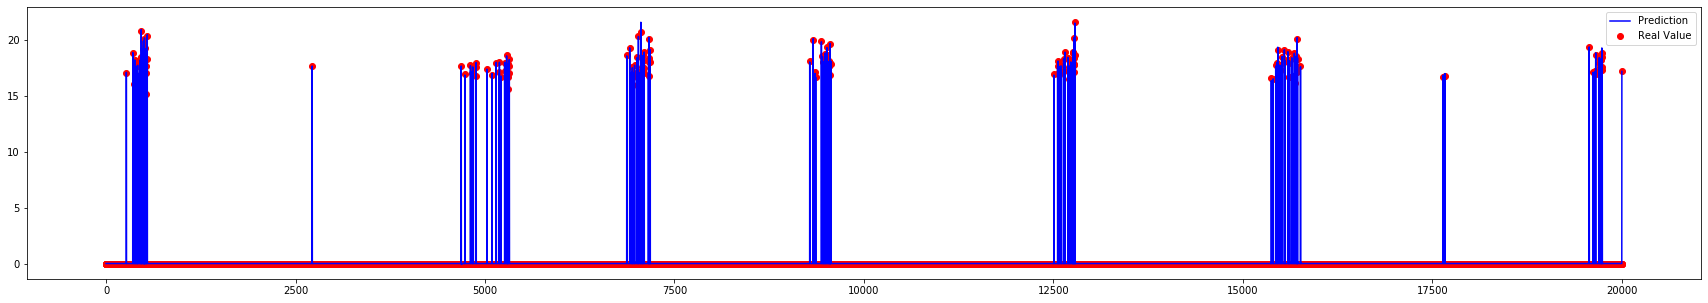

In [13]:
fig = plt.figure(figsize=(30,5))
ax = plt.axes()
predictions = pd.Series(gbr.predict(test_X))
ax.plot(predictions.index, predictions, color = 'blue', label='Prediction')
ax.scatter(test_y.index, test_y, color = 'red', label='Real Value')

ax.legend(loc='best')
plt.show()